# Dataset

In [1]:
import pandas as pd

dataset_df = pd.read_csv('data/csv/All.csv', encoding='utf-8', dtype=str, low_memory=False)

In [2]:
dataset_df

,PTTp,PTTf,PTTd,HeartRate,SBP,DBP,AI,LASI,S1,S2,S3,S4
0,0.0883809523809524,0.44000000000000006,2.6733333333333333,125.12695097297141,130.43329604900043,64.68913169835835,0.9922470519252067,2.392,11.784402737047898,4.340562267839687,2.131208602150538,18.303930400782015
1,0.07000000000000002,0.41515789473684217,1.672,123.96177910670554,157.72738151641408,64.38629825186952,0.9177047289504034,3.84,6.033327859237537,7.44174467253177,5.302010557184752,18.826870772238514
2,0.07847619047619048,0.44320000000000004,0.504,121.96242854624663,140.10442869493437,50.98347603952466,0.989021633839199,1.48,3.8016195503421315,2.742877028347996,11.476136070381234,18.06877732160313
3,0.05676190476190477,0.3928000000000001,3.544,129.59047971954195,138.06274513634833,55.58459066198415,0.9848300582474556,0.48,13.149560899315741,0.9034979472140763,4.079298533724341,18.179439296187688
4,0.0712,0.4374736842105264,3.2440000000000007,121.84646571478936,132.6019742786947,55.93626821274539,0.9975117862755369,1.488,6.727907722385142,2.710827761485826,8.864481720430108,18.350898142717497
...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.5011428571428571,0.3822857142857144,2.518857142857143,90.13468008419939,168.8285046099021,97.14496720610043,0.9449321628092577,4.008,8.27980136852395,7.3020715542522,2.2052527859237534,17.840430889540567
4941,0.3381333333333334,0.2661333333333333,4.872571428571429,90.51399808433051,138.18569728798263,78.64674610664025,0.894874694922317,0.504,16.8972715542522,1.0228183773216033,0.8687593352883677,18.837203519061585
4942,0.5068571428571428,0.41599999999999987,1.0426666666666666,90.51821592016374,178.1948408953702,78.07234000152394,0.9983107051241943,2.824,6.2422357771260994,4.815519843597263,7.001963636363637,18.109645356793745
4943,0.29947826086956525,0.20973913043478265,3.3327999999999998,155.74575797668763,113.00553565632205,56.17062845987654,0.997623177233892,7.712,3.030912218963832,15.89653567937439,1.3085294232649072,20.284596676441836


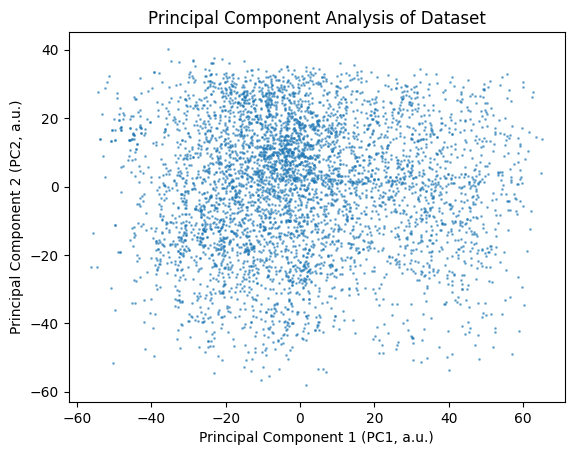

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA_sklearn

dataset_initial_PCA = PCA_sklearn(n_components=2)
PC1, PC2 = dataset_initial_PCA.fit_transform(dataset_df).T

plt.scatter(PC1, PC2, s=1, alpha=0.5)
plt.xlabel('Principal Component 1 (PC1, a.u.)')
plt.ylabel('Principal Component 2 (PC2, a.u.)')
plt.title('Principal Component Analysis of Dataset')
plt.show()
plt.savefig('figures/PCA_initial.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
import numpy as np

DBP = dataset_df['DBP'].astype(np.float32)
SBP = dataset_df['SBP'].astype(np.float32)
X = dataset_df.drop(columns=['DBP', 'SBP']).astype(np.float32)

X.shape, DBP.shape, dbp.shape

((4945, 10), (4945,), (4945,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, dbp_train, dbp_test, sbp_train, sbp_test = train_test_split(
    X, DBP, SBP, test_size=0.2, random_state=42
)

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression(y_true, y_pred, label="Model"):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    results_df = pd.DataFrame({
        'Model': [label],
        'R^2': [r2],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae]
    })
    print(results_df)

    plt.figure(figsize=(5, 5))
    plt.scatter(y_true, y_pred, alpha=0.5, label=label)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{label} for Calibration Curve")
    plt.legend()
    plt.show()

    errors = y_true - y_pred
    plt.figure(figsize=(6, 5))
    plt.hist(errors, bins=40, edgecolor='black', alpha=0.7)
    plt.xlabel("Error (True - Predicted)")
    plt.ylabel("Frequency")
    plt.title(f"Error Distribution for {label}")
    plt.show()

# Linear Regression

                   Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP  0.004339  51.435329  7.171843  5.612247


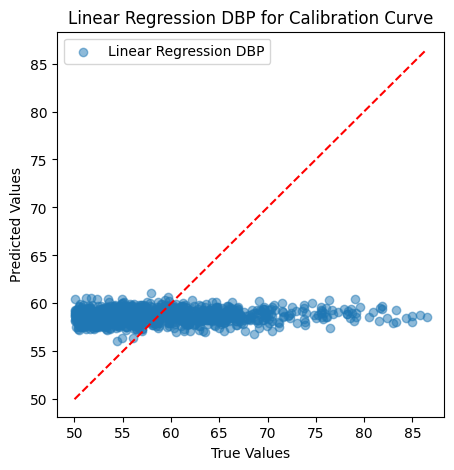

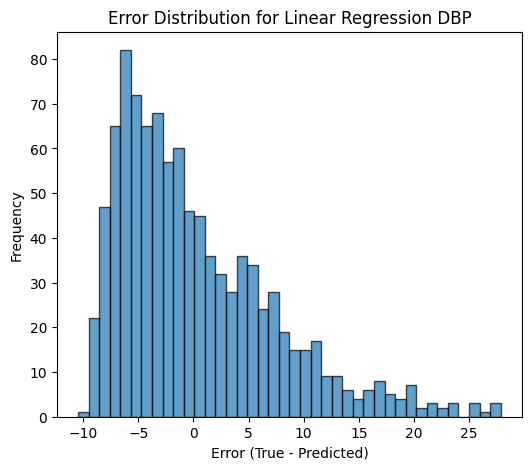

In [17]:
from sklearn.linear_model import LinearRegression

# Linear Regression for DBP
lr_dbp = LinearRegression()
lr_dbp.fit(X_train, dbp_train)
dbp_pred_lr = lr_dbp.predict(X_test)
evaluate_regression(dbp_test, dbp_pred_lr, label="Linear Regression DBP")

                   Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP  0.011551  358.867371  18.943794  15.621503


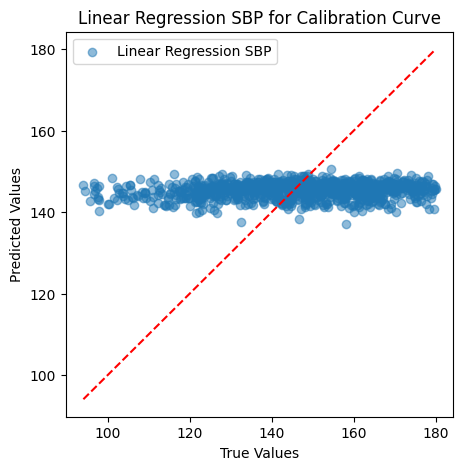

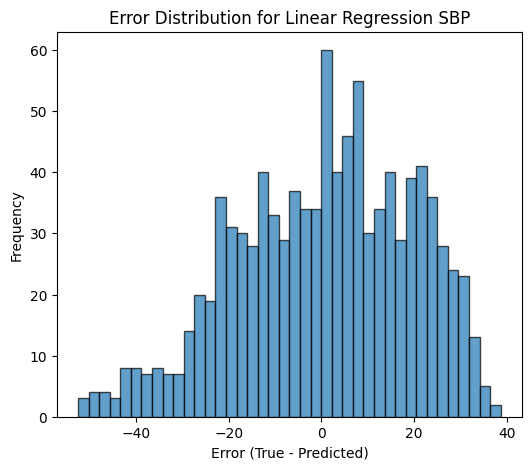

In [ ]:
# Linear Regression for SBP
lr_dbp = LinearRegression()
lr_dbp.fit(X_train, dbp_train)
dbp_pred_lr = lr_dbp.predict(X_test)
evaluate_regression(sbp_test, sbp_pred_lr, label="Linear Regression SBP")

# Random Forest Regressor

               Model       R^2       MSE      RMSE       MAE
0  Random Forest DBP  0.006625  51.31728  7.163608  5.619486


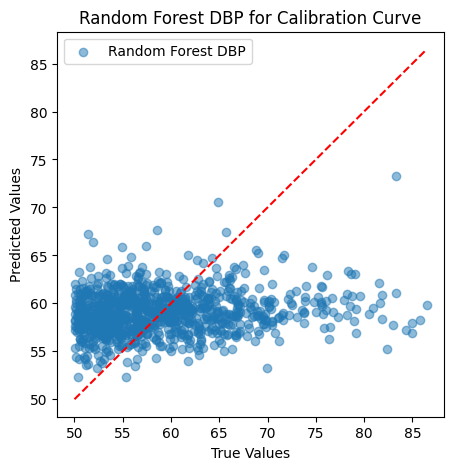

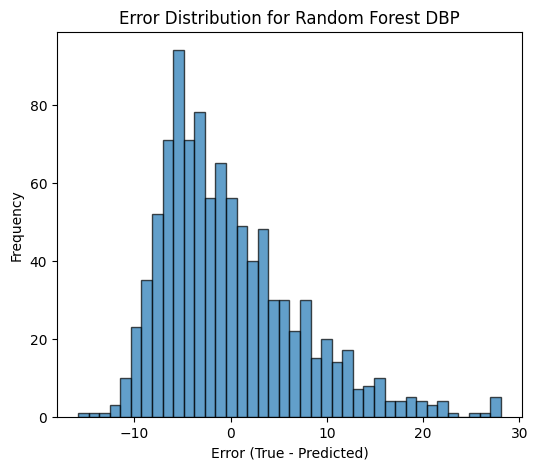

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest for DBP
rf_dbp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_dbp.fit(X_train, dbp_train)
dbp_pred_rf = rf_dbp.predict(X_test)
evaluate_regression(dbp_test, dbp_pred_rf, label="Random Forest DBP")

               Model      R^2         MSE       RMSE        MAE
0  Random Forest SBP  0.14013  312.185369  17.668768  14.003902


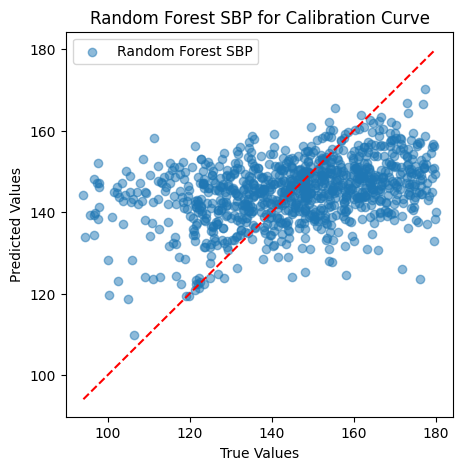

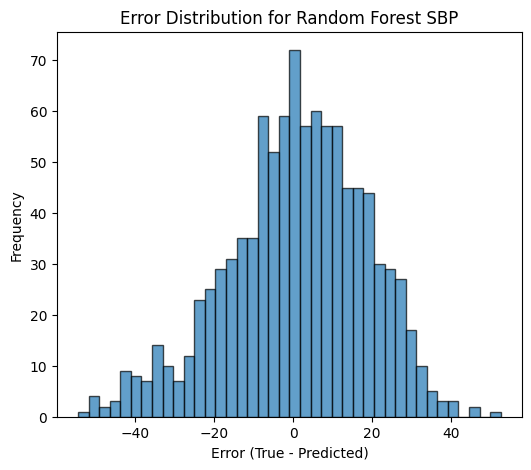

In [20]:
# Random Forest for SBP
rf_sbp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sbp.fit(X_train, sbp_train)
sbp_pred_rf = rf_sbp.predict(X_test)
evaluate_regression(sbp_test, sbp_pred_rf, label="Random Forest SBP")

# XGBoost Regressor

         Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP -0.151842  59.503567  7.713855  5.872109


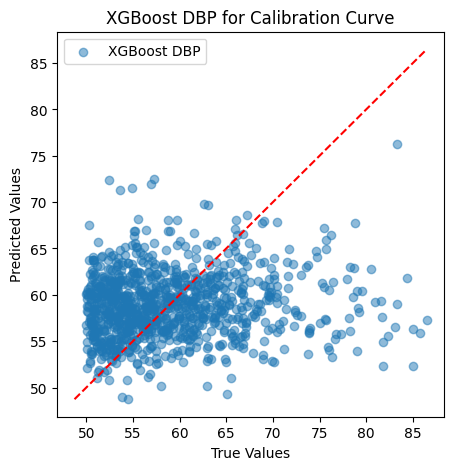

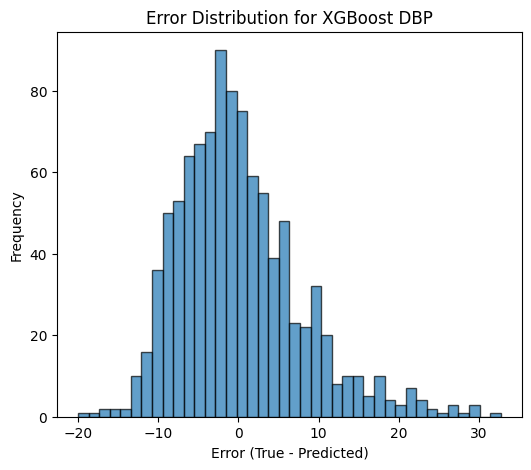

In [21]:
from xgboost import XGBRegressor

# XGBoost for DBP
xgb_dbp = XGBRegressor(random_state=42)
xgb_dbp.fit(X_train, dbp_train)
dbp_pred_xgb = xgb_dbp.predict(X_test)
evaluate_regression(dbp_test, dbp_pred_xgb, label="XGBoost DBP")

         Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP  0.021112  355.395874  18.851946  14.797199


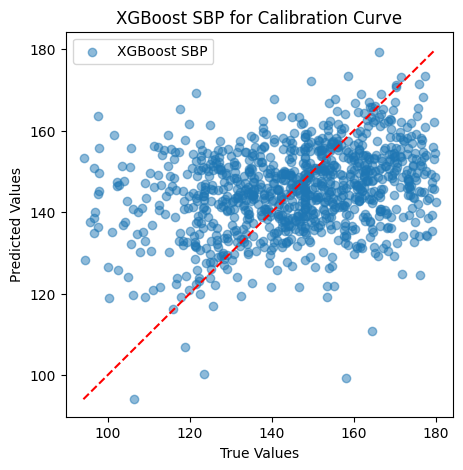

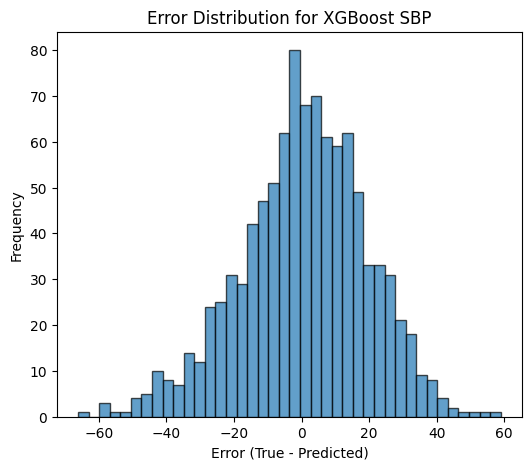

In [22]:

# XGBoost for SBP
xgb_sbp = XGBRegressor(random_state=42)
xgb_sbp.fit(X_train, sbp_train)
sbp_pred_xgb = xgb_sbp.predict(X_test)
evaluate_regression(sbp_test, sbp_pred_xgb, label="XGBoost SBP")

# Support Vector Machine

     Model       R^2         MSE      RMSE        MAE
0  SVM SBP -0.006788  365.525451  19.11872  15.536955


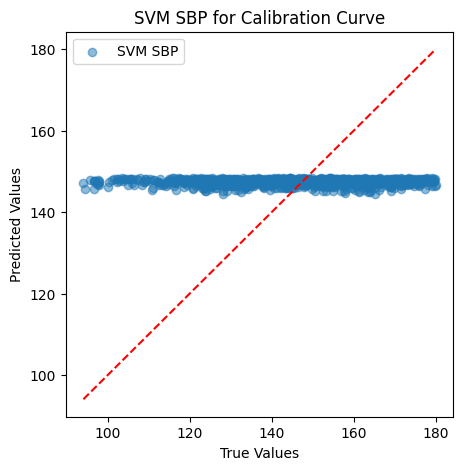

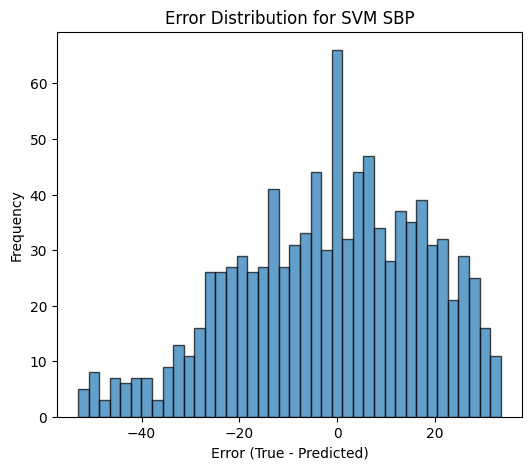

In [23]:
from sklearn.svm import SVR

# SVM for SBP
svm_sbp = SVR(kernel='rbf')
svm_sbp.fit(X_train, sbp_train)
sbp_pred_svm = svm_sbp.predict(X_test)
evaluate_regression(sbp_test, sbp_pred_svm, label="SVM SBP")

     Model      R^2        MSE      RMSE       MAE
0  SVM DBP -0.07563  55.566496  7.454294  5.474444


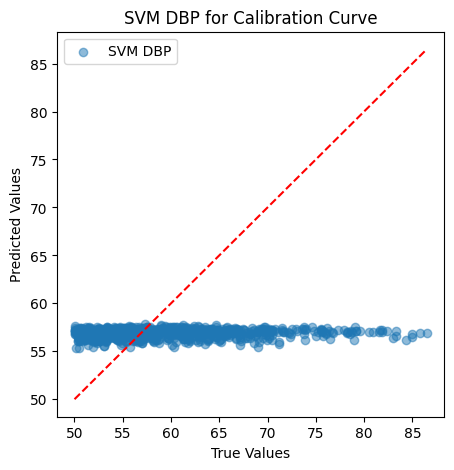

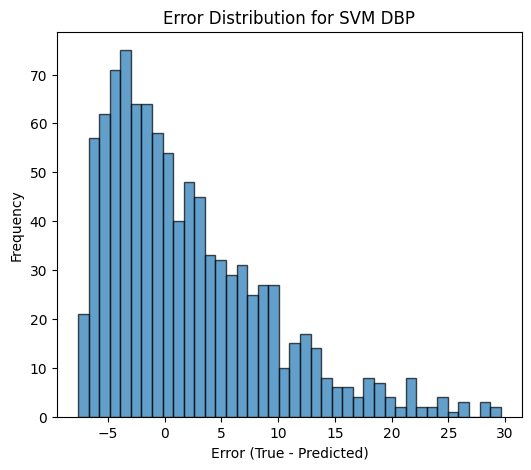

In [24]:
# SVM for SBP
svm_dbp = SVR(kernel='rbf')
svm_dbp.fit(X_train, dbp_train)
dbp_pred_svm = svm_dbp.predict(X_test)
evaluate_regression(dbp_test, dbp_pred_svm, label="SVM DBP")

# Multilayer Perceptron Regressor

c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


     Model       R^2         MSE       RMSE        MAE
0  MLP SBP -0.188168  431.377289  20.769625  16.911119


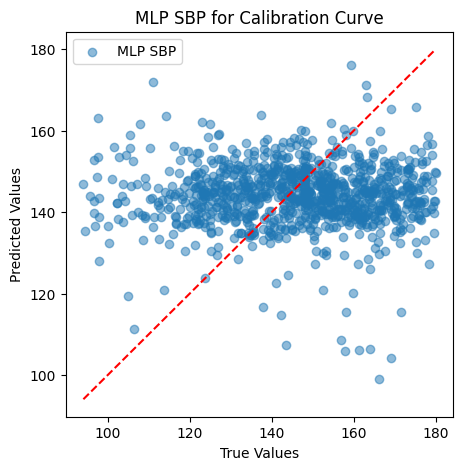

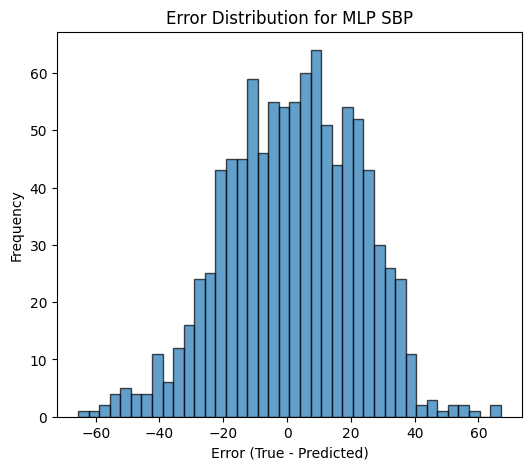

In [28]:
from sklearn.neural_network import MLPRegressor

# Train a basic multilayer perceptron for SBP
mlp_sbp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
mlp_sbp.fit(X_train, sbp_train)

# Predict and visualize
sbp_pred_mlp = mlp_sbp.predict(X_test)
evaluate_regression(sbp_test, sbp_pred_mlp, label="MLP SBP")

c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


     Model       R^2        MSE      RMSE      MAE
0  MLP DBP -0.101137  56.884193  7.542161  5.93147


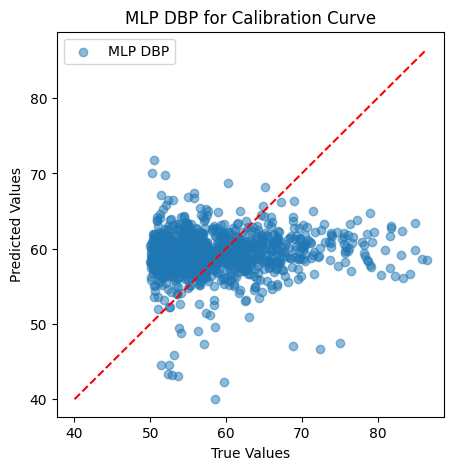

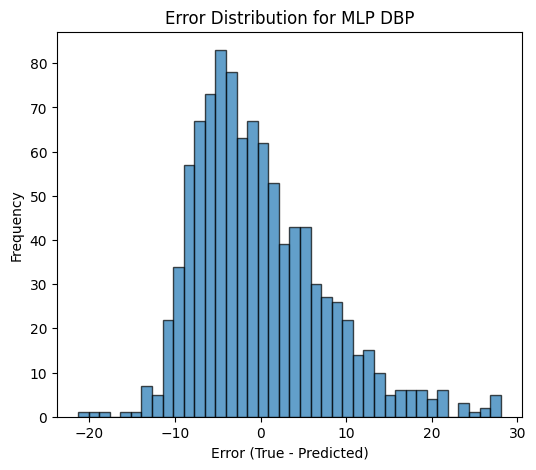

In [29]:
# Train a basic multilayer perceptron for DBP
mlp_dbp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
mlp_dbp.fit(X_train, dbp_train)

# Predict and visualize
dbp_pred_mlp = mlp_dbp.predict(X_test)
evaluate_regression(dbp_test, dbp_pred_mlp, label="MLP DBP")